NEW STRAT HEATMAP


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn import linear_model
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [2]:
# 20列 12行的表 读取表
data=pd.read_excel('C:/Users/SZT/testheatmap2.xls')  
data
# 如果是DataFrame，则df的index/column信息会分别对应到heatmap的columns和rows，即df.index是热力图的行标，df.columns是热力图的列标

,year,month,data,month2,data2
0,2001,January,4.240319e+07,1,-1
1,2001,February,5.306025e+07,2,1
2,2001,March,5.363608e+07,3,1
3,2001,April,4.857140e+07,4,1
4,2001,May,3.569333e+07,5,-1
...,...,...,...,...,...
223,2019,August,9.892394e+06,8,-2
224,2019,September,1.685851e+07,9,-2
225,2019,October,3.448001e+07,10,-1
226,2019,November,3.800406e+07,11,-1


分别计算每个月的斜率

In [13]:
d1=data.loc[data['month2']=,:]=3
d1

SyntaxError: invalid syntax (<ipython-input-13-355f86e5f678>, line 1)

[-67092.84792016]
187633154.09274253


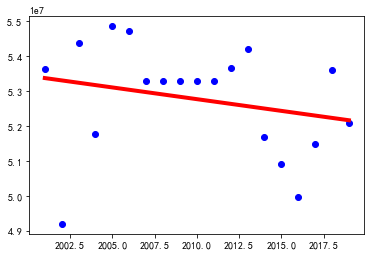

In [4]:
regr = linear_model.LinearRegression()  
# 拟合 
regr.fit(d1['year'].values.reshape(-1, 1), d1['data']) # 注意此处.reshape(-1, 1)，因为X是一维的！ 
# 不难得到直线的斜率、截距 
a, b = regr.coef_, regr.intercept_ 
print(a)
print(b)
plt.scatter(d1['year'], d1['data'], color='blue')  
# 2.拟合的直线 
plt.plot(d1['year'], regr.predict(d1['year'].values.reshape(-1,1)), color='red', linewidth=4) 
plt.show()

In [5]:
txt=[-56918.019,-97135.66,-98358.462,-80701.04,-74115.9,-68314.29,-14239.652,1839.44,-64574.6,-23155.96,-39398.94,-103396.87]

我知道为什么会有出入了 因为最新的删除了一些数据  因为月份并不是全部都对应的

In [6]:
# 这个是为了做那个坐标的 想要显示为1-12月 而不是12月-1月
# M=2019
# N=1
# # data=pd.DataFrame(data,index=['12','11','10','9','8','7','6','5','4','3','2','1'],
# #                   columns=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
# data=pd.DataFrame(data,index='index',
#                   columns=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])

# # data = pd.DataFrame(data, columns=np.arange(2000,M+1), index=np.arange(12,N-1))
# data

按照季度

分别计算每个月的斜率

In [7]:
#这个是保存在data2里面的 现在不用了
# aa=data['data']
# # print(np.mean(aa))
# # print('std',np.std(aa))
# # print(np.percentile(aa,50))
# Q1=np.percentile(aa,25)
# Q3=np.percentile(aa,75)


# high=Q3+1.5*(Q3-Q1)
# Q5=Q3+(Q3-Q1)
# Q4=Q3+0.5*(Q3-Q1)

# Q0=Q1-0.5*(Q3-Q1)
# Q00=Q1-(Q3-Q1)
# low=Q1-1.5*(Q3-Q1)

# print('high',high)#4
# print('Q5',Q5)#
# print('Q4',Q4)#
# print('Q3',np.percentile(aa,75)) #2
# print('Q2',np.percentile(aa,50))#0
# print('Q1',np.percentile(aa,25))#-2
# print('Q0',Q0)#-3
# print('Q00',Q00)#-3
# print('low',low)#-4
# # print('ll',ll)

In [8]:
data['data3']=data['data']
data

,year,month,data,month2,data2,data3
0,2001,January,4.240319e+07,1,-1,4.240319e+07
1,2001,February,5.306025e+07,2,1,5.306025e+07
2,2001,March,5.363608e+07,3,1,5.363608e+07
3,2001,April,4.857140e+07,4,1,4.857140e+07
4,2001,May,3.569333e+07,5,-1,3.569333e+07
...,...,...,...,...,...,...
223,2019,August,9.892394e+06,8,-2,9.892394e+06
224,2019,September,1.685851e+07,9,-2,1.685851e+07
225,2019,October,3.448001e+07,10,-1,3.448001e+07
226,2019,November,3.800406e+07,11,-1,3.800406e+07


看距平就是先计算年平均再计算差值

In [9]:
data.loc[data['month2'] == 1, 'data3']-=data.loc[data['month2'] == 1, 'data'].sum()/19
data.loc[data['month2'] == 2, 'data3']-=data.loc[data['month2'] == 2, 'data'].sum()/19
data.loc[data['month2'] == 3, 'data3']-=data.loc[data['month2'] == 3, 'data'].sum()/19
data.loc[data['month2'] == 4, 'data3']-=data.loc[data['month2'] == 4, 'data'].sum()/19
data.loc[data['month2'] == 5, 'data3']-=data.loc[data['month2'] == 5, 'data'].sum()/19
data.loc[data['month2'] == 6, 'data3']-=data.loc[data['month2'] == 6, 'data'].sum()/19
data.loc[data['month2'] == 7, 'data3']-=data.loc[data['month2'] == 7, 'data'].sum()/19
data.loc[data['month2'] == 8, 'data3']-=data.loc[data['month2'] == 8, 'data'].sum()/19
data.loc[data['month2'] == 9, 'data3']-=data.loc[data['month2'] == 9, 'data'].sum()/19
data.loc[data['month2'] == 10, 'data3']-=data.loc[data['month2'] == 10, 'data'].sum()/19
data.loc[data['month2'] == 11, 'data3']-=data.loc[data['month2'] == 11, 'data'].sum()/19
data.loc[data['month2'] == 12, 'data3']-=data.loc[data['month2'] == 12, 'data'].sum()/19
data

,year,month,data,month2,data2,data3
0,2001,January,4.240319e+07,1,-1,9.506314e+05
1,2001,February,5.306025e+07,2,1,1.062445e+06
2,2001,March,5.363608e+07,3,1,8.595486e+05
3,2001,April,4.857140e+07,4,1,5.817360e+05
4,2001,May,3.569333e+07,5,-1,-2.672229e+05
...,...,...,...,...,...,...
223,2019,August,9.892394e+06,8,-2,-1.475897e+05
224,2019,September,1.685851e+07,9,-2,-3.984186e+05
225,2019,October,3.448001e+07,10,-1,1.128010e+06
226,2019,November,3.800406e+07,11,-1,7.563735e+05


data.groupby('month2')['data'].sum()[1]/19

In [10]:
datap = data.pivot("month2", "year", "data3")

In [11]:

# fig, ax = plt.subplots(figsize=(12,6))  ###
# # fig, ax = plt.subplots(1,2)
# # ax = plt.subplot(121)
# data2 = {    
#     '12': -103.39687,
#      '11':-39.39894,
#      '10': -23.15596,
#      '9': -64.5746,
#      '8': -1.83944,
#      '7': -14.239652,
#      '6': -68.31429,
#      '5': -74.1159,
#      '4': -80.70104,
#      '3': -98.358462,
#      '2': -97.13566,
#      '1': -56.918019
#     }
# group_data = list(data2.values())
# group_names = list(data2.keys())

# # Default Settings
# plt.figure()
# plt.barh(group_names, group_data)
# plt.title('trend of NH snow cover area (10³ km²/yr)')
# plt.title('北半球月积雪面积趋势')



# #  分界线

# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

# plt.title('北半球积雪面积月距平')#标题

# # cmap='RdBu_r' 颜色主题风格   xticklabels 代表步长  cmap='YlGnBu'    vmax=4,vmin=-4,
# sns_plot = sns.heatmap(datap,cmap='RdBu_r',ax=ax, xticklabels=3, yticklabels=1)

# # tick_params 中 direction='in'表示刻度线位于内侧，另外还有参数 out,inout
# sns_plot.tick_params(labelsize=15, direction='out')

# ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# # cax = plt.gcf().axes[-1]
# # colorbar 中 top='off', bottom='off', left='off', right='off'表示上下左右侧的刻度线全部不显示
# #sns_plot.tick_params(labelsize=20, direction='out', top='off', bottom='off', left='off', right='off')

# plt.figure(dpi=120)
# plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'spines'

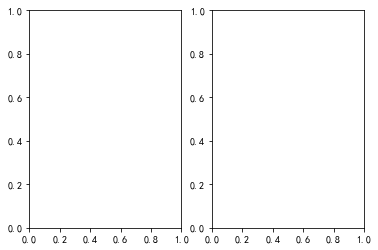

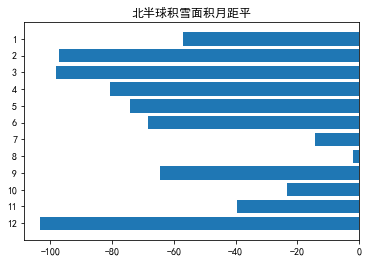

In [12]:

fig, ax = plt.subplots(1,2)  ###
# fig, ax = plt.subplots(1,2)
# ax = plt.subplot(121)
data2 = {    
    '12': -103.39687,
     '11':-39.39894,
     '10': -23.15596,
     '9': -64.5746,
     '8': -1.83944,
     '7': -14.239652,
     '6': -68.31429,
     '5': -74.1159,
     '4': -80.70104,
     '3': -98.358462,
     '2': -97.13566,
     '1': -56.918019
    }
group_data = list(data2.values())
group_names = list(data2.keys())

# Default Settings
plt.figure()
plt.barh(group_names, group_data)
plt.title('trend of NH snow cover area (10³ km²/yr)')
plt.title('北半球月积雪面积趋势')



#  分界线

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

plt.title('北半球积雪面积月距平')#标题

# cmap='RdBu_r' 颜色主题风格   xticklabels 代表步长  cmap='YlGnBu'    vmax=4,vmin=-4,
sns_plot = sns.heatmap(datap,cmap='RdBu_r',ax=ax, xticklabels=3, yticklabels=1)

# tick_params 中 direction='in'表示刻度线位于内侧，另外还有参数 out,inout
sns_plot.tick_params(labelsize=15, direction='out')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# cax = plt.gcf().axes[-1]
# colorbar 中 top='off', bottom='off', left='off', right='off'表示上下左右侧的刻度线全部不显示
#sns_plot.tick_params(labelsize=20, direction='out', top='off', bottom='off', left='off', right='off')

plt.figure(dpi=120)
plt.show()

最新的显示在同一副画中  ok
但是还有一点我们计算的好像不是整个北半球的啊
其他sca  scf 的计算还不涉及区域 但是这个是要比较精确的啊 啊啊啊 这个不好整? 其实还是每个人的是不同的没事



In [ ]:
data['data4']=data['data']
data

In [ ]:
data['data4'].sum()/19


In [ ]:
y01=data.loc[data['year'] == 2001, 'data4'].sum()-data['data4'].sum()/19
y02=data.loc[data['year'] == 2002, 'data4'].sum()-data['data4'].sum()/19
y03=data.loc[data['year'] == 2003, 'data4'].sum()-data['data4'].sum()/19
y04=data.loc[data['year'] == 2004, 'data4'].sum()-data['data4'].sum()/19
y05=data.loc[data['year'] == 2005, 'data4'].sum()-data['data4'].sum()/19
y06=data.loc[data['year'] == 2006, 'data4'].sum()-data['data4'].sum()/19
y07=data.loc[data['year'] == 2007, 'data4'].sum()-data['data4'].sum()/19
y08=data.loc[data['year'] == 2008, 'data4'].sum()-data['data4'].sum()/19
y09=data.loc[data['year'] == 2009, 'data4'].sum()-data['data4'].sum()/19
y10=data.loc[data['year'] == 2010, 'data4'].sum()-data['data4'].sum()/19
y11=data.loc[data['year'] == 2011, 'data4'].sum()-data['data4'].sum()/19
y12=data.loc[data['year'] == 2012, 'data4'].sum()-data['data4'].sum()/19
y13=data.loc[data['year'] == 2013, 'data4'].sum()-data['data4'].sum()/19
y14=data.loc[data['year'] == 2014, 'data4'].sum()-data['data4'].sum()/19
y15=data.loc[data['year'] == 2015, 'data4'].sum()-data['data4'].sum()/19
y16=data.loc[data['year'] == 2016, 'data4'].sum()-data['data4'].sum()/19
y17=data.loc[data['year'] == 2007, 'data4'].sum()-data['data4'].sum()/19
y18=data.loc[data['year'] == 2018, 'data4'].sum()-data['data4'].sum()/19
y19=data.loc[data['year'] == 2019, 'data4'].sum()-data['data4'].sum()/19


In [ ]:
ydata = {    
    '2001': y01,
    '2002': y02,
    '2003': y03,
    '2004': y04,
    '2005': y05,
    '2006': y06,
    '2007': y07,
    '2008': y08,
    '2009': y09,
    '2010': y10,
    '2011': y11,
    '2012': y12,
    '2013': y13,
    '2014': y14,
    '2015': y15,
    '2016': y16,
    '2017': y17,
    '2018': y18,
    '2019': y19
    }
group_data = list(ydata.values())
group_names = list(ydata.keys())

# Default Settings
plt.figure(figsize=(12,8))
plt.bar(group_names, group_data)
plt.title('北半球积雪面积年距平')

分界线 这个往下就不是对的了

In [ ]:
stop

In [ ]:
# # 这个是最基本的例子
# # import matplotlib.pyplot as plt
# import seaborn as sns
# # sns.set_theme()

# # Load the example flights dataset and convert to long-form
# flights_long = sns.load_dataset("flights")
# flights = flights_long.pivot("month", "year", "passengers")

# # Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(12, 6))
# sns.heatmap(flights, annot=False, fmt="d", linewidths=.5, ax=ax)
# # sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

-----------------------


In [ ]:
# import os
# import matplotlib.pyplot as plt
# import matplotlib
# import pandas as pd
# import seaborn as sns
# from PIL import Image as ImagePIL, ImageFont, ImageDraw#设置保存图片的dpi
# df = pd.read_excel('C:/Users/SZT/testheatmap.xls') #相应的文件位置
# df

In [ ]:
# #纵坐标标签
# list=[]
# for i in range(df.shape[0]):
#     list.append(df['R2'][i])
# row=list
# #横坐标标签
# df.columns.values[1:]
# #dataframe转化成二维矩阵
# df_array=df.iloc[:,1:].values


In [ ]:
# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
# #创建一个画布
# fig, ax = plt.subplots(figsize=(11,9))#设置画布大小
# im=ax.imshow(df_array,cmap='Greys'，aspect='auto')#cmap='Greys'),设置热力图颜色，一般默认为蓝黄色，aspect='auto'热力块大小随着画布大小自动变化，如果不设置的话为方框。
# #create colorbar色条
# cbar=ax.figure.colorbar(im, ax=ax)
# #colorbar的设置
# cbar.ax.set_ylabel('score', rotation=-90, va="bottom",fontsize=18,fontname='Times New Roman')#colorbar标签为‘score’，纵向放置，字体大小为18，字体为新罗马字体

# #color色条本身上刻度值大小及字体设置
# cbar.ax.tick_params(labelsize=10)
# cbarlabels = cbar.ax.get_yticklabels() 
# [label.set_fontname('Times New Roman') for label in cbarlabels]
# #热力图设置
# ax.set_xticks(np.arange(len(df.columns.values[1:])))
# ax.set_yticks(np.arange(len(row)))
# #用各自的列表项来标记他们
# ax.set_xticklabels(df.columns.values[1:])
# ax.set_yticklabels(row)
# #关闭网格并用白色加宽网格
# for edge, spine in ax.spines.items():
#         spine.set_visible(False)

# ax.set_xticks(np.arange(column+1)-.5, minor=True)
# ax.set_yticks(np.arange(len(row)+1)-.5, minor=True)
# ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
# ax.tick_params(which="minor", bottom=False, left=False)
# #添加每个热力块的具体数值,保留两位小数
# for i in range(df.shape[0]):
#     for j in range(1,df.shape[1]):
#         text = ax.text(j-1,i,df.iloc[i,j].round(2),ha="center", va="center", color="w",fontsize=12,fontname='Times New Roman')
# #设置图例并且设置图例的字体及大小

# #设置坐标刻度值的大小以及刻度值的字体
# plt.tick_params(labelsize=15)
# labels = ax.get_xticklabels() + ax.get_yticklabels()
# [label.set_fontname('Times New Roman') for label in labels]
 
# #设置横纵坐标的名称及热力图名称以及对应字体格式
# font1 = {'family' : 'Times New Roman',
# 'weight' : 'normal',
# 'size'   : 20,
# }
# #横纵轴的名称
# plt.xlabel('round',font1)
# plt.ylabel('value',font1)
# #热力图名称
# ax.set_title('DX model score',font1)
# #图的输出
# #将文件保存至文件中并且画出图,dpi设置高分辨率输出
# plt.savefig('figure.eps',dpi=400)
# fig.tight_layout()
# plt.show()


In [ ]:
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt
# df = pd.read_excel(r"E:\通量数据\数据分析\分参数模型分析\全部点分模型R2汇总.xlsx",sheet_name='当雄').set_index('R2')

# fig, ax = plt.subplots(figsize = (9,9))

# sns.heatmap(df,annot=True, vmax=1,vmin = 0.8, xticklabels= True, yticklabels= True, square=False, cmap=None)

# plt.show()


In [ ]:
# #绘制混淆矩阵

# df_cm=pd.DataFrame(data,index=['消极','中性','积极'],
#                   columns=['消极','中性','积极'])
 
# plt.figure(figsize=(10,8))
# f, ax= plt.subplots(figsize = (10, 8))
 
# h=sns.heatmap(df_cm,annot=True,cmap="binary",fmt='.20g',ax=ax,linewidths=2,
#             annot_kws={'size':30},cbar=False)
 
# #h=sns.heatmap(data, annot=True,fmt='d',linewidths=0.5,cbar=False) #设置不使用其默认自带的colorbar
# cb=h.figure.colorbar(h.collections[0]) #显示colorbar
# cb.ax.tick_params(labelsize=24) #设置colorbar刻度字体大小。
 
# ax.tick_params(labelsize=24)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
 
# plt.ylabel('实际结果',fontsize=24)
# plt.xlabel('预测结果',fontsize=24)
# plt.show()